In [19]:
# Iris Flower Classification Project
# Author: Sidharth M
# Minor Project

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
# Load and exploring the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

In [21]:
print("First 5 rows of dataset:\n", X.head())
print("\nUnique species:", iris.target_names)

First 5 rows of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Unique species: ['setosa' 'versicolor' 'virginica']


In [22]:
# Train- Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Applying K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(" #### KNN Model Evaluation ####")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))

 #### KNN Model Evaluation ####
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
## Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(" #### Decision Tree Model Evaluation ####")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree, target_names=iris.target_names))

 #### Decision Tree Model Evaluation ####
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



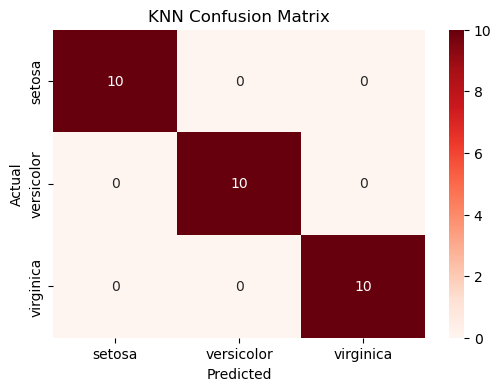

In [25]:
## Visualization

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap="Reds",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()